In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer=pd.read_excel('Customerdata_Train.xlsx',index_col=0)
email = pd.read_excel('Emaildata_Train.xlsx',index_col=0)
train = pd.read_excel('Train.xlsx',index_col=0)
transaction = pd.read_excel('transactionsdata_Train.xlsx',index_col=0)

In [3]:
customer

,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
CustomerID,,,,,,
C16368,CITY2,2012-09-28,0,0,0,Monday
C20345,CITY2,2010-12-19,1,1,1,Friday
C17683,CITY2,2010-10-03,0,0,0,Wednesday
C18647,CITY4,2010-11-27,0,0,0,Monday
C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...
C23511,CITY2,2018-01-17,1,1,0,Friday
C12197,CITY3,2018-01-17,1,0,1,Friday
C40967,CITY3,2018-01-17,1,0,0,Saturday


In [4]:
email

,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
CustomerID,,,,,
C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...
C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes


In [5]:
train

,RetentionPotential
CustomerID,
C37869,Low
C33841,Low
C29464,Low
C28158,Low
C22785,High
...,...
C14975,Low
C30392,Low
C41735,Low


In [6]:
transaction

,DateOfOrder,timestamp,OrderQuantity
CustomerID,,,
C16368,2013-08-11,15:17:52,15
C20345,2011-04-01,19:50:00,92
C20345,2012-06-29,15:11:56,95
C20345,2012-09-22,20:49:10,74
C20345,2011-08-23,11:50:26,81
...,...,...,...
C12197,2018-01-17,14:35:40,56
C40967,2018-01-17,17:15:20,35
C36140,2018-01-17,13:12:54,47


In [7]:
email = pd.pivot_table(email, index='CustomerID', columns='EmailType', values='MailOpened', aggfunc='count')
email.columns.name = None 
email

,CustomizedEmail,WelcomeEmail
CustomerID,,
C12116,31.0,1.0
C12117,NaN,1.0
C12118,NaN,1.0
C12119,41.0,1.0
C12120,NaN,1.0
...,...,...
C42185,43.0,1.0
C42186,NaN,1.0
C42187,NaN,1.0


A pivot operation is a data transformation technique used in data analysis to reshape and summarize data into a desired format. The pivot operation involves reorganizing a table of data into a new table by rotating the data from rows into columns, potentially aggregating data in the process.

The pivot operation requires specifying three main arguments:

Index: The column or columns used to group the data.

Columns: The column whose unique values become new columns in the output table.

Values: The column(s) whose values will fill the cells in the new table.

In pandas, the pivot operation is implemented as a method on a DataFrame object, and it returns a new DataFrame object with a reshaped structure.

In [8]:
transaction = pd.pivot_table(transaction, index='CustomerID', values=['DateOfOrder', 'OrderQuantity'], aggfunc={'DateOfOrder': 'count', 'OrderQuantity': 'sum'})
transaction


,DateOfOrder,OrderQuantity
CustomerID,,
C12116,3,115
C12117,1,41
C12118,1,41
C12119,1,52
C12120,1,31
...,...,...
C42185,13,1340
C42186,1,46
C42187,1,41


In [9]:
Customer_email = pd.merge(customer, email, how='left', on=['CustomerID'])
Customer_email 

,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,CustomizedEmail,WelcomeEmail
CustomerID,,,,,,,,
C16368,CITY2,2012-09-28,0,0,0,Monday,29.0,1.0
C20345,CITY2,2010-12-19,1,1,1,Friday,95.0,1.0
C17683,CITY2,2010-10-03,0,0,0,Wednesday,NaN,1.0
C18647,CITY4,2010-11-27,0,0,0,Monday,30.0,1.0
C36692,CITY2,2009-12-04,1,1,0,Friday,64.0,1.0
...,...,...,...,...,...,...,...,...
C23511,CITY2,2018-01-17,1,1,0,Friday,NaN,1.0
C12197,CITY3,2018-01-17,1,0,1,Friday,NaN,1.0
C40967,CITY3,2018-01-17,1,0,0,Saturday,NaN,1.0


In [10]:
Customer_email_tran = pd.merge(Customer_email, transaction, how='left', on=['CustomerID'])
Customer_email_tran

,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity
CustomerID,,,,,,,,,,
C16368,CITY2,2012-09-28,0,0,0,Monday,29.0,1.0,1,15
C20345,CITY2,2010-12-19,1,1,1,Friday,95.0,1.0,186,15614
C17683,CITY2,2010-10-03,0,0,0,Wednesday,NaN,1.0,13,443
C18647,CITY4,2010-11-27,0,0,0,Monday,30.0,1.0,7,748
C36692,CITY2,2009-12-04,1,1,0,Friday,64.0,1.0,34,2350
...,...,...,...,...,...,...,...,...,...,...
C23511,CITY2,2018-01-17,1,1,0,Friday,NaN,1.0,1,41
C12197,CITY3,2018-01-17,1,0,1,Friday,NaN,1.0,1,56
C40967,CITY3,2018-01-17,1,0,0,Saturday,NaN,1.0,1,35


In [11]:
final = pd.merge(Customer_email_tran, train, how='left', on=['CustomerID'])
final

,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity,RetentionPotential
CustomerID,,,,,,,,,,,
C16368,CITY2,2012-09-28,0,0,0,Monday,29.0,1.0,1,15,High
C20345,CITY2,2010-12-19,1,1,1,Friday,95.0,1.0,186,15614,Low
C17683,CITY2,2010-10-03,0,0,0,Wednesday,NaN,1.0,13,443,Medium
C18647,CITY4,2010-11-27,0,0,0,Monday,30.0,1.0,7,748,Low
C36692,CITY2,2009-12-04,1,1,0,Friday,64.0,1.0,34,2350,Low
...,...,...,...,...,...,...,...,...,...,...,...
C23511,CITY2,2018-01-17,1,1,0,Friday,NaN,1.0,1,41,Low
C12197,CITY3,2018-01-17,1,0,1,Friday,NaN,1.0,1,56,Low
C40967,CITY3,2018-01-17,1,0,0,Saturday,NaN,1.0,1,35,Low


<Axes: xlabel='RetentionPotential', ylabel='count'>

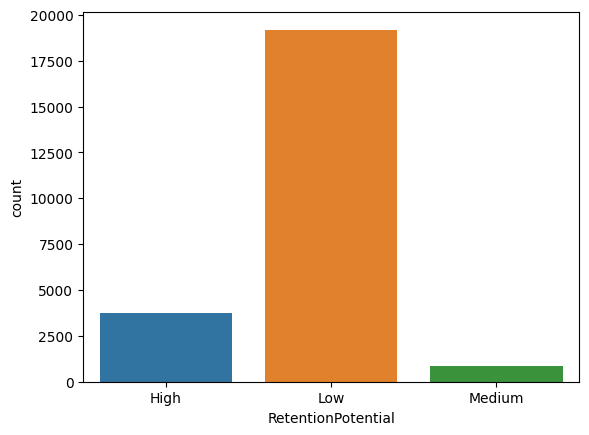

In [12]:
sns.countplot(x= final["RetentionPotential"])

<Axes: xlabel='DoorstepDelivery', ylabel='count'>

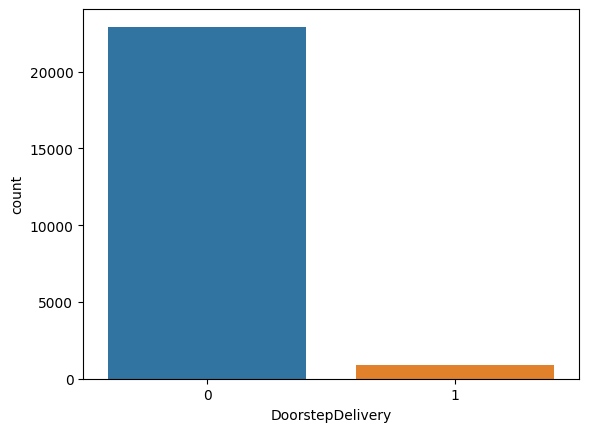

In [13]:
sns.countplot(x= final["DoorstepDelivery"])
#0 means false coust purchased from shop

<Axes: xlabel='PreferredDeliveryDay', ylabel='OrderQuantity'>

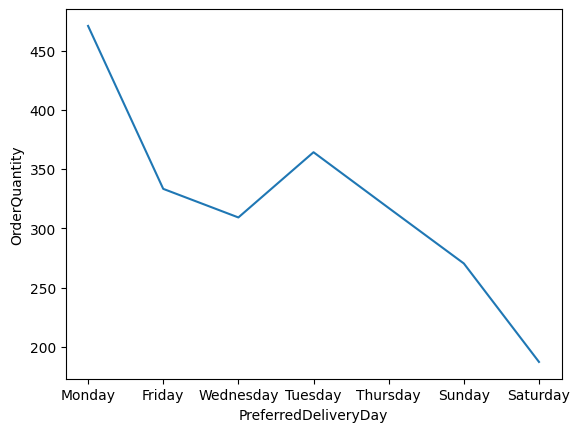

In [15]:
sns.lineplot(data=final, x="PreferredDeliveryDay", y="OrderQuantity",ci=None)

In [16]:
final.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity
count,23820.000000,23820.000000,23820.000000,14111.000000,23820.0,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615,34.997661,1.0,4.397775,357.622922
std,0.473580,0.292821,0.190268,13.367909,0.0,12.142475,1335.649680
min,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000
25%,0.000000,0.000000,0.000000,29.000000,1.0,1.000000,41.000000
50%,1.000000,0.000000,0.000000,38.000000,1.0,1.000000,65.000000
75%,1.000000,0.000000,0.000000,45.000000,1.0,3.000000,169.000000
max,1.000000,1.000000,1.000000,291.000000,1.0,257.000000,51429.000000


In [17]:
for i in final.columns:
    print(i,final[i].unique())

City ['CITY2' 'CITY4' 'CITY3' 'CITY1']
DateOfRegistration ['2012-09-28T00:00:00.000000000' '2010-12-19T00:00:00.000000000'
 '2010-10-03T00:00:00.000000000' ... '2018-01-14T00:00:00.000000000'
 '2018-01-13T00:00:00.000000000' '2018-01-17T00:00:00.000000000']
OnlineCommunication [0 1]
AutomaticRefill [0 1]
DoorstepDelivery [0 1]
PreferredDeliveryDay ['Monday' 'Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Sunday' 'Saturday']
CustomizedEmail [ 29.  95.  nan  30.  64.  34.  48.  40.  69.  38.  16.  45.  57.  46.
  47.  18.  49.  50.  53.  23.  41.  42.  33.  44.  39.  52.  37.  11.
  22.  32.  43.  31.  36.  60.  14.   3.  87.  51.  35.  12.  59.  27.
  58.  26.  55.  54.   8.  56.   5.  20.   1.  13.   6.   9.   2.   7.
  10.  68.   4.  25.  15.  63.  28.  65.  61.  66.  21.  17.  76.  24.
 226.  62. 101.  82.  74.  19.  73.  79.  70. 123. 291.  84.  72.  88.]
WelcomeEmail [1.]
DateOfOrder [  1 186  13   7  34 137 100  86  69  75 130  45  22  67   4  35  16  27
   2  12  21  41   3  29 108  1

In [18]:
final.isna().sum()

City                       0
DateOfRegistration         0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
CustomizedEmail         9709
WelcomeEmail               0
DateOfOrder                0
OrderQuantity              0
RetentionPotential         0
dtype: int64

In [19]:
final.isna().mean()

City                    0.000000
DateOfRegistration      0.000000
OnlineCommunication     0.000000
AutomaticRefill         0.000000
DoorstepDelivery        0.000000
PreferredDeliveryDay    0.000000
CustomizedEmail         0.407599
WelcomeEmail            0.000000
DateOfOrder             0.000000
OrderQuantity           0.000000
RetentionPotential      0.000000
dtype: float64

In [20]:
final.dtypes

City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
CustomizedEmail                float64
WelcomeEmail                   float64
DateOfOrder                      int64
OrderQuantity                    int64
RetentionPotential              object
dtype: object

In [21]:
final['CustomizedEmail']= final['CustomizedEmail'].fillna(method="ffill")

In [22]:
final.isna().mean()

City                    0.0
DateOfRegistration      0.0
OnlineCommunication     0.0
AutomaticRefill         0.0
DoorstepDelivery        0.0
PreferredDeliveryDay    0.0
CustomizedEmail         0.0
WelcomeEmail            0.0
DateOfOrder             0.0
OrderQuantity           0.0
RetentionPotential      0.0
dtype: float64

In [23]:
obj=final.select_dtypes(include='object')
obj.columns

Index(['City', 'PreferredDeliveryDay', 'RetentionPotential'], dtype='object')

In [24]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}

    def fit_transform(self, y):
        unique_labels = set(y)
        for i, label in enumerate(unique_labels):
            self.labels[label] = i

        encoded_labels = []
        for label in y:
            encoded_labels.append(self.labels[label])

        return encoded_labels

    def inverse_transform(self, y):
        inv_labels = {v: k for k, v in self.labels.items()}

        decoded_labels = []
        for label in y:
            decoded_labels.append(inv_labels[label])

        return decoded_labels

In [25]:
encoded={}
for i in obj.columns:
    le = LabelEncoder()
    encoded_data = le.fit_transform(obj[i])
    encoded[i]=encoded_data
encoded
df=pd.DataFrame(encoded)
pd.set_option('display.max_columns', None)
df

,City,PreferredDeliveryDay,RetentionPotential
0,3,3,1
1,3,6,2
2,3,4,0
3,2,3,2
4,3,6,2
...,...,...,...
23815,3,6,2
23816,1,6,2
23817,1,1,2
23818,1,1,2


In [26]:
final=final.drop('City',axis=1)
final=final.drop('PreferredDeliveryDay',axis=1)
final=final.drop('RetentionPotential',axis=1)

final=final.drop('DateOfRegistration',axis=1)

final.reset_index(drop=True, inplace=True)
final

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity
0,0,0,0,29.0,1.0,1,15
1,1,1,1,95.0,1.0,186,15614
2,0,0,0,95.0,1.0,13,443
3,0,0,0,30.0,1.0,7,748
4,1,1,0,64.0,1.0,34,2350
...,...,...,...,...,...,...,...
23815,1,1,0,6.0,1.0,1,41
23816,1,0,1,6.0,1.0,1,56
23817,1,0,0,6.0,1.0,1,35
23818,1,1,0,8.0,1.0,2,100


In [27]:
final = pd.concat([final,df], axis=1)
final

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity,City,PreferredDeliveryDay,RetentionPotential
0,0,0,0,29.0,1.0,1,15,3,3,1
1,1,1,1,95.0,1.0,186,15614,3,6,2
2,0,0,0,95.0,1.0,13,443,3,4,0
3,0,0,0,30.0,1.0,7,748,2,3,2
4,1,1,0,64.0,1.0,34,2350,3,6,2
...,...,...,...,...,...,...,...,...,...,...
23815,1,1,0,6.0,1.0,1,41,3,6,2
23816,1,0,1,6.0,1.0,1,56,1,6,2
23817,1,0,0,6.0,1.0,1,35,1,1,2
23818,1,1,0,8.0,1.0,2,100,1,1,2


In [42]:
int64=final.select_dtypes(include ='int64')
int64.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'DateOfOrder', 'OrderQuantity', 'City', 'PreferredDeliveryDay',
       'RetentionPotential'],
      dtype='object')

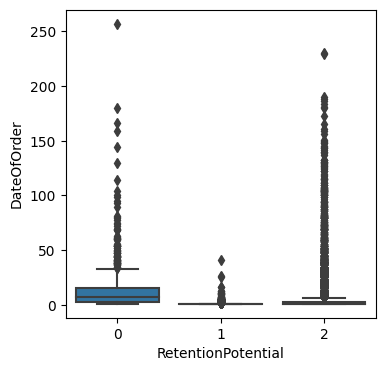

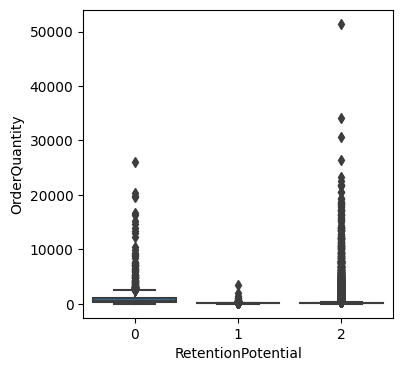

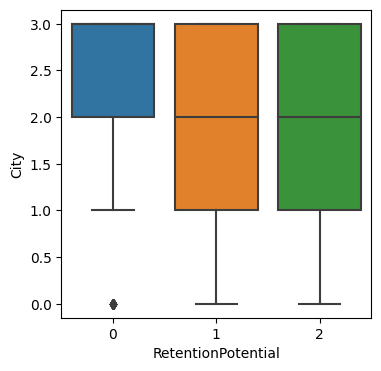

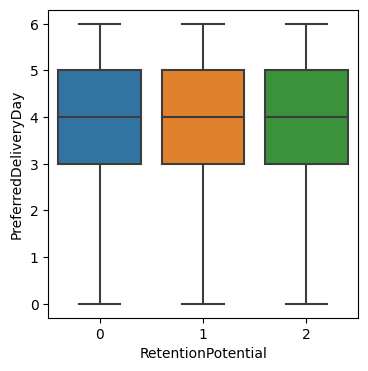

In [49]:
feature =['DateOfOrder', 'OrderQuantity', 'City', 'PreferredDeliveryDay']

colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]

# plt.figure(figsize=(20,10))
# sns.boxplot(data = feature,palette = colours)
# plt.xticks(rotation=90)
# plt.show()

for i in feature:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=final["RetentionPotential"], y=int64[i])
    plt.show()

In [28]:
final['RetentionPotential'].unique()

array([1, 2, 0])

In [29]:
y=final['RetentionPotential']
x=final.drop('RetentionPotential',axis=1)


In [30]:
x

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,CustomizedEmail,WelcomeEmail,DateOfOrder,OrderQuantity,City,PreferredDeliveryDay
0,0,0,0,29.0,1.0,1,15,3,3
1,1,1,1,95.0,1.0,186,15614,3,6
2,0,0,0,95.0,1.0,13,443,3,4
3,0,0,0,30.0,1.0,7,748,2,3
4,1,1,0,64.0,1.0,34,2350,3,6
...,...,...,...,...,...,...,...,...,...
23815,1,1,0,6.0,1.0,1,41,3,6
23816,1,0,1,6.0,1.0,1,56,1,6
23817,1,0,0,6.0,1.0,1,35,1,1
23818,1,1,0,8.0,1.0,2,100,1,1


In [31]:
def train_test_split(X, y, test_ratio=0.2, random_state=None):
   
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    shuffle_idx = np.random.permutation(num_samples)
    test_size = int(num_samples * test_ratio)

    X_train = X.iloc[shuffle_idx[test_size:],:]
    y_train = y.iloc[shuffle_idx[test_size:]]
    X_test = X.iloc[shuffle_idx[:test_size],:]
    y_test = y.iloc[shuffle_idx[:test_size]]

    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_ratio=0.2,random_state=42)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train

array([[1.0e+00, 0.0e+00, 0.0e+00, ..., 3.1e+01, 1.0e+00, 0.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.4e+01, 1.0e+00, 5.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 4.1e+01, 2.0e+00, 0.0e+00],
       ...,
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 7.9e+03, 3.0e+00, 5.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 8.7e+01, 0.0e+00, 0.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 3.5e+01, 1.0e+00, 5.0e+00]])

In [33]:
y_test

array([2, 2, 2, ..., 2, 2, 2])

In [34]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a

In [35]:
StandardScaler(X_train)
StandardScaler(X_test)

array([[ 0.71111813, -0.32613374, -0.2043695 , ..., -0.17845723,
        -1.01647298,  0.71916993],
       [ 0.71111813, -0.32613374, -0.2043695 , ..., -0.1894663 ,
        -1.01647298, -1.28411938],
       [-1.40623611, -0.32613374, -0.2043695 , ...,  1.82812912,
         0.12346988, -0.28247472],
       ...,
       [-1.40623611, -0.32613374, -0.2043695 , ...,  0.37860167,
         1.26341274,  1.21999225],
       [ 0.71111813, -0.32613374, -0.2043695 , ..., -0.21515413,
        -1.01647298,  1.21999225],
       [ 0.71111813, -0.32613374, -0.2043695 , ..., -0.21515413,
         1.26341274, -0.28247472]])

In [36]:
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow import keras

from sklearn import preprocessing
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=3)


import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=20,
    restore_best_weights=True
)

model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ["accuracy"])

# Train the ANN
history = model.fit(X_train, y_train_onehot, batch_size = 128, epochs = 50, validation_split=0.2, callbacks=early_stop)



2023-03-09 22:23:47.063545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


2023-03-09 22:23:49.533318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


120/120 [==============================] - 0s 2ms/step - loss: 0.9771 - accuracy: 0.7852 - val_loss: 0.5653 - val_accuracy: 0.8098
Epoch 2/50
120/120 [==============================] - 0s 807us/step - loss: 0.6151 - accuracy: 0.7950 - val_loss: 0.5288 - val_accuracy: 0.8098
Epoch 3/50
120/120 [==============================] - 0s 799us/step - loss: 0.5447 - accuracy: 0.8010 - val_loss: 0.4923 - val_accuracy: 0.8098
Epoch 4/50
120/120 [==============================] - 0s 784us/step - loss: 0.5224 - accuracy: 0.8019 - val_loss: 0.4859 - val_accuracy: 0.8098
Epoch 5/50
120/120 [==============================] - 0s 785us/step - loss: 0.5085 - accuracy: 0.8038 - val_loss: 0.4942 - val_accuracy: 0.8098
Epoch 6/50
120/120 [==============================] - 0s 786us/step - loss: 0.5127 - accuracy: 0.8044 - val_loss: 0.4919 - val_accuracy: 0.8093
Epoch 7/50
120/120 [==============================] - 0s 791us/step - loss: 0.5084 - accuracy: 0.8038 - val_loss: 0.4824 - val_accuracy: 0.8122
Epoch

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 15)                255       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 48        
                                                                 
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


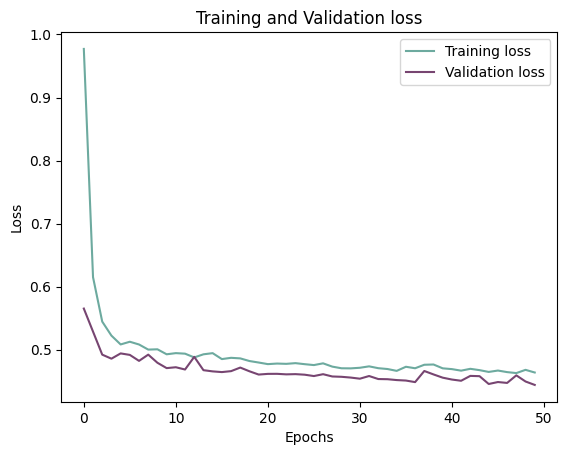

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

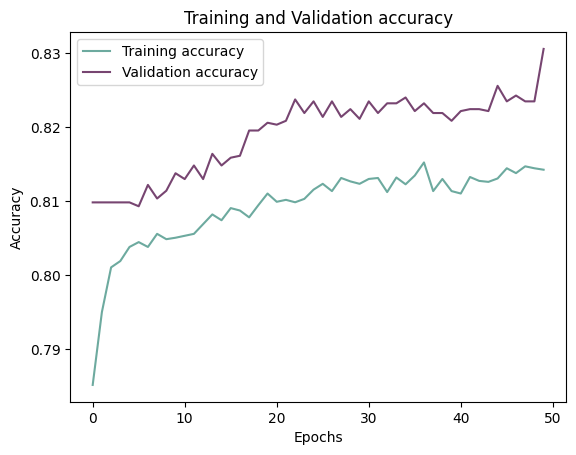

In [39]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
predict_x=model.predict(X_test) 
print(predict_x)

classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

149/149 [==============================] - 0s 396us/step
[[1.0129033e-05 7.1949586e-02 9.2804027e-01]
 [2.4213006e-05 9.5174618e-02 9.0480119e-01]
 [1.8381286e-01 5.8169007e-05 8.1612897e-01]
 ...
 [1.5410905e-01 4.2214412e-03 8.4166956e-01]
 [2.8893189e-03 5.2318287e-01 4.7392783e-01]
 [3.5333742e-05 2.5992826e-01 7.4003643e-01]]
[2 2 2 ... 2 1 2]


In [41]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 81.91%
